# Taryn Michael
# Mfundo Monchwe
# Kyle Groenewald




# Problem Statement 
Human body contains 60% to 65% of water. We can't even survive without water for few days. But we have a huge source of water. Water covers majority portion of the Earth.

Though water is the most abandant resource on the Earth, still only about 2% water can be used for drinking. Now, the 2% also contains suspended solids, sulfates, organic carbon, etc. and if their portions increases more than specified value, this water can't be used for drinking. So the most abandant resource resource on the Earth, which covers 70% of our planet and we can't use it! We thus need a computational way to determine which water is of good quality and drinkable and which is not. This may also in future assist in ways to determine how to improve the quality of water to have an abundance of it fit for human consumption.


# Dataset
The dataset below provides information on samples from water bodies and information on the safety of consumption for humans. The dataset was downloaded from Kaggle.



Firstly, we will import the dataset, preprocess and analyze it.


## Exploratory data analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [ ]:
data = files.upload()

Saving Exam_data.csv to Exam_data.csv


In [ ]:
data = pd.read_csv('water_potability.csv', delimiter=';')

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Getting to know the data
### pH
pH is a measurement of electrically charged particles in a substance. It indicates how acidic or alkaline (basic) that substance is. The pH scale ranges from 0 to 14

The WHO guidelines for Drinking water is between 6.5 and 8.5 Outside these limits many halmful metals may become soluble.

### Hardness
Hardness is the amount of dissolved calcium and magnesium in the water. Not of health concern at levels found in drinking-water, however can remove other metals that maybe be harmful.

The taste threshold for the calcium ion is in the range of 100–300 mg/l. the taste threshold for magnesium is probably lower than that for calcium. In some instances, consumers tolerate water hardness in excess of 500 mg/l

### Solids
Total dissolved solids (TDS) comprise inorganic salts (principally calcium, magnesium, potassium, sodium, bicarbonates, chlorides and sulfates) and small amounts of organic matter that are dissolved in water

The palatability of water with a total dissolved solids (TDS) level of less than about 600 mg/l is generally considered to be good; drinking-water becomes significantly and increasingly unpalatable at TDS levels greater than about 1000 mg/l.

Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

### Chloramines
Monochloramine, dichloramines and trichloramines are considered by-products of drinking-water chlorination. Chloramines, such as monochloramine, dichloramine and trichloramine (nitrogen trichloride), are generated from the reaction of chlorine with ammonia. Among chloramines, monochloramine is the only useful chlorine disinfectant, and chloramination systems are operated to minimize the formation of dichloramine and trichloramine. Higher chloramines, particularly trichloramine, are likely to give rise to taste and odour complaints, except at very low concentrations.

For monochloramine, no odour or taste was detected at concentrations between 0.5 and 1.5 mg/l. For dichloramine, the organoleptic effects between 0.1 and 0.5 mg/l were found to be “slight” and “acceptable”. Most individuals are able to taste chloramines at concentrations below 5 mg/l, and some at levels as low as 0.3 mg/l.

Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

### Sulfate
Sulfates occur naturally in numerous minerals and are used commercially, principally in the chemical industry. They are discharged into water in industrial wastes and through atmospheric deposition; however, the highest levels usually occur in groundwater and are from natural sources. The presence of sulfate in drinking-water can cause noticeable taste, and very high levels might cause a laxative effect in unaccustomed consumers. Taste impairment varies with the nature of the associated cation; taste thresholds have been found to range from 250 mg/l for sodium sulfate to 1000 mg/l for calcium sulfate. It is generally considered that taste impairment is minimal at levels below 250 mg/l. No health-based guideline value has been derived for sulfate. Not of health concern at levels found in drinking-water. The ratio of the chloride and sulfate concentrations to the bicarbonate concentration (Larson ratio).

### Conductivity
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

### Total Organic Carbon (TOC)
High colour from natural organic carbon (e.g. humics) could also indicate a high propensity to produce by-products from disinfection processes. No health-based guideline value is proposed for colour in drinking-water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

Trihalomethanes
THMs are formed in drinking-water primarily as a result of chlorination of organic matter present naturally in raw water supplies. The rate and degree of THM formation increase as a function of the chlorine and humic acid concentration, temperature, pH and bromide ion concentration. Bromide can be involved in the reaction between chlorine and naturally occurring organic matter in drinking-water, forming brominated and mixed chloro-bromo by-products, such as trihalomethanes (THMs) and halogenated acetic acids (HAAs), or it can react with ozone to form bromate. Trihalomethanes and haloacetic acids are the most common DBPs and occur at among the highest concentrations in drinking-water. THM levels up to 80 ppm is considered safe in drinking water.

### Turbidity
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. High levels of turbidity can protect microorganisms from the effects of disinfection, stimulate the growth of bacteria and give rise to a significant chlorine demand. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

### Potability (target variable)
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [ ]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


We see that all variables are of numerical data types. Potability is an integer data type and our target variable. The rest are our predictor variables.

We currently have 9 predictor variables and one target variable. Our target variable is binary.

Our data also consists of 3276 total observations.

In [ ]:
data.describe(include='all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


The range of values for each variable is quite high and thus we can hypothesise that we may need to normalize the data before feeding it into the model.

#### **Looking at the target variable**

**Checking for class imbalance**

We can determine whether we are working with class imbalance or not by looking at the number of postive and negative (potable water or not) cases of our target variable. If it represents one class much more than the other, our model will end up being more biased towards that particular class

In [ ]:
y = data.Potability.value_counts()
labels = [0, 1]
print(y)

0    1998
1    1278
Name: Potability, dtype: int64


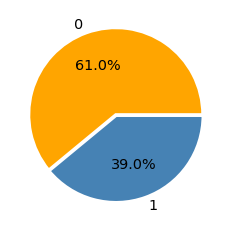

In [ ]:

plt.pie(y, 
        labels = labels,
        autopct = '%1.1f%%',
        colors=['orange', 'steelblue'], 
        explode = [0.005]*len(labels),
        textprops={'size': 'x-large'},
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.show()



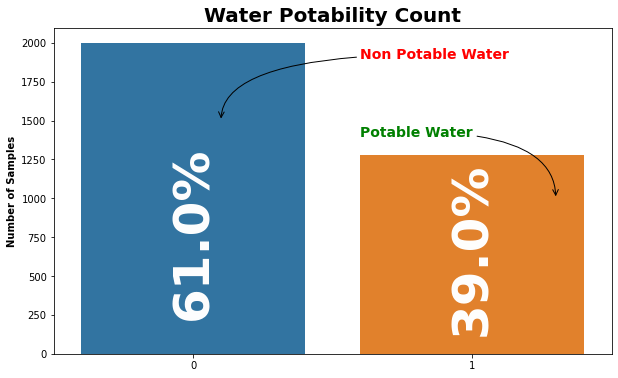

In [ ]:
colors = ['#06344d', '#00b2ff']

fig = plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Potability', data = data)


for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/7, 
            s = f"{np.round(i.get_height()/len(data)*100, 0)}%", 
            ha = 'center', size = 50, weight = 'bold', rotation = 90, color = 'white')

plt.title("Water Potability Count", size = 20, weight = 'bold')

plt.annotate(s  = "Non Potable Water", xytext = (0.6, 1900), xy = (0.1, 1500),
             arrowprops = dict(arrowstyle = "->", color = 'black', connectionstyle = "angle3, angleA = 0, angleB = 90"), 
             color = 'red', weight = 'bold', size = 14)
plt.annotate(s = "Potable Water", xytext = (0.6, 1400), xy = (1.3, 1000), 
             arrowprops = dict(arrowstyle = "->", color = 'black', connectionstyle = "angle3, angleA = 0, angleB = 90"), 
             color = 'green', weight = 'bold', size = 14)

plt.xlabel(None)
plt.ylabel('Number of Samples', weight = 'bold');

We see that there is currently some class imbalance in the data, with 61% of the observations representing Potability = 0. This means the data favours the outcome of non potable water.
However, when looking at the actual amount of observations for each class, we see that:
- Non potable water has 2000 observations 
- Potable water has 1250 observations.

This number is not that far apart and although it is unbalanced, it is not by an extremely high margin and thus no class balancing will be done. 


#### Correlations between variables

The correlation matrix allows one to observe the correlations between all the variables. I.e. it allows oneto detect whether a variable is positively or negatively correlated with our target variable

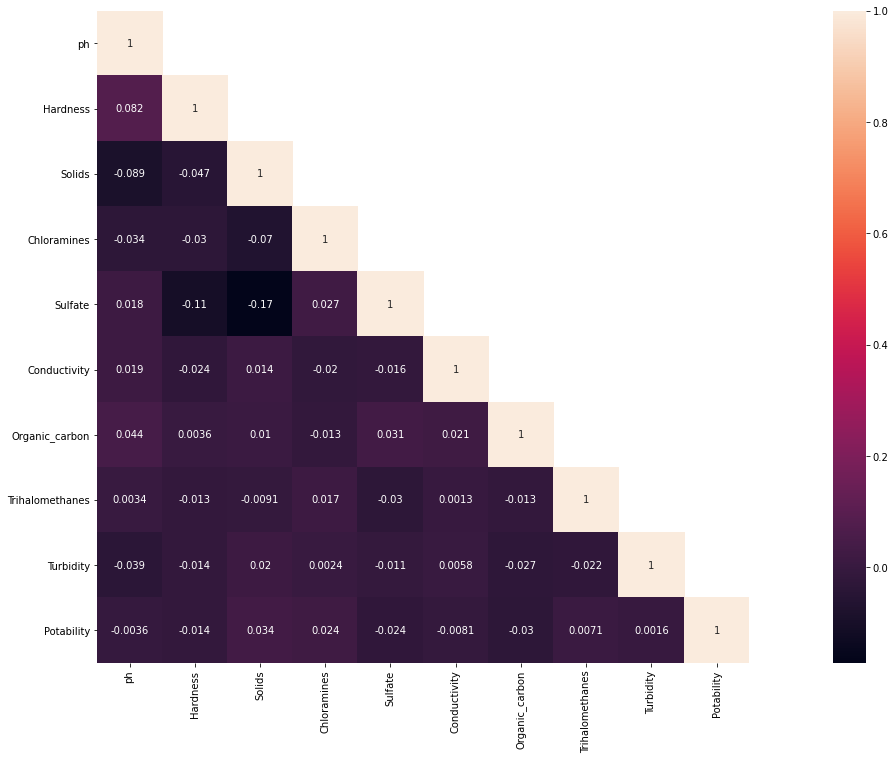

In [ ]:
cor_mat = data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30, 12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

According to the correlation matrix, there is no multicolinearity present in the data.

We can also see that most of the variables are negatively correlated with Potability. However, there are no strong correlations between variables. The maximum correlation is 17% or 0.17 (negetive) between Sulfate and Solids, it means only 17% variance in the Solids can be explained by Sulfate and vice versa.

Now, let's see how the features influence each other.

<Figure size 432x288 with 0 Axes>

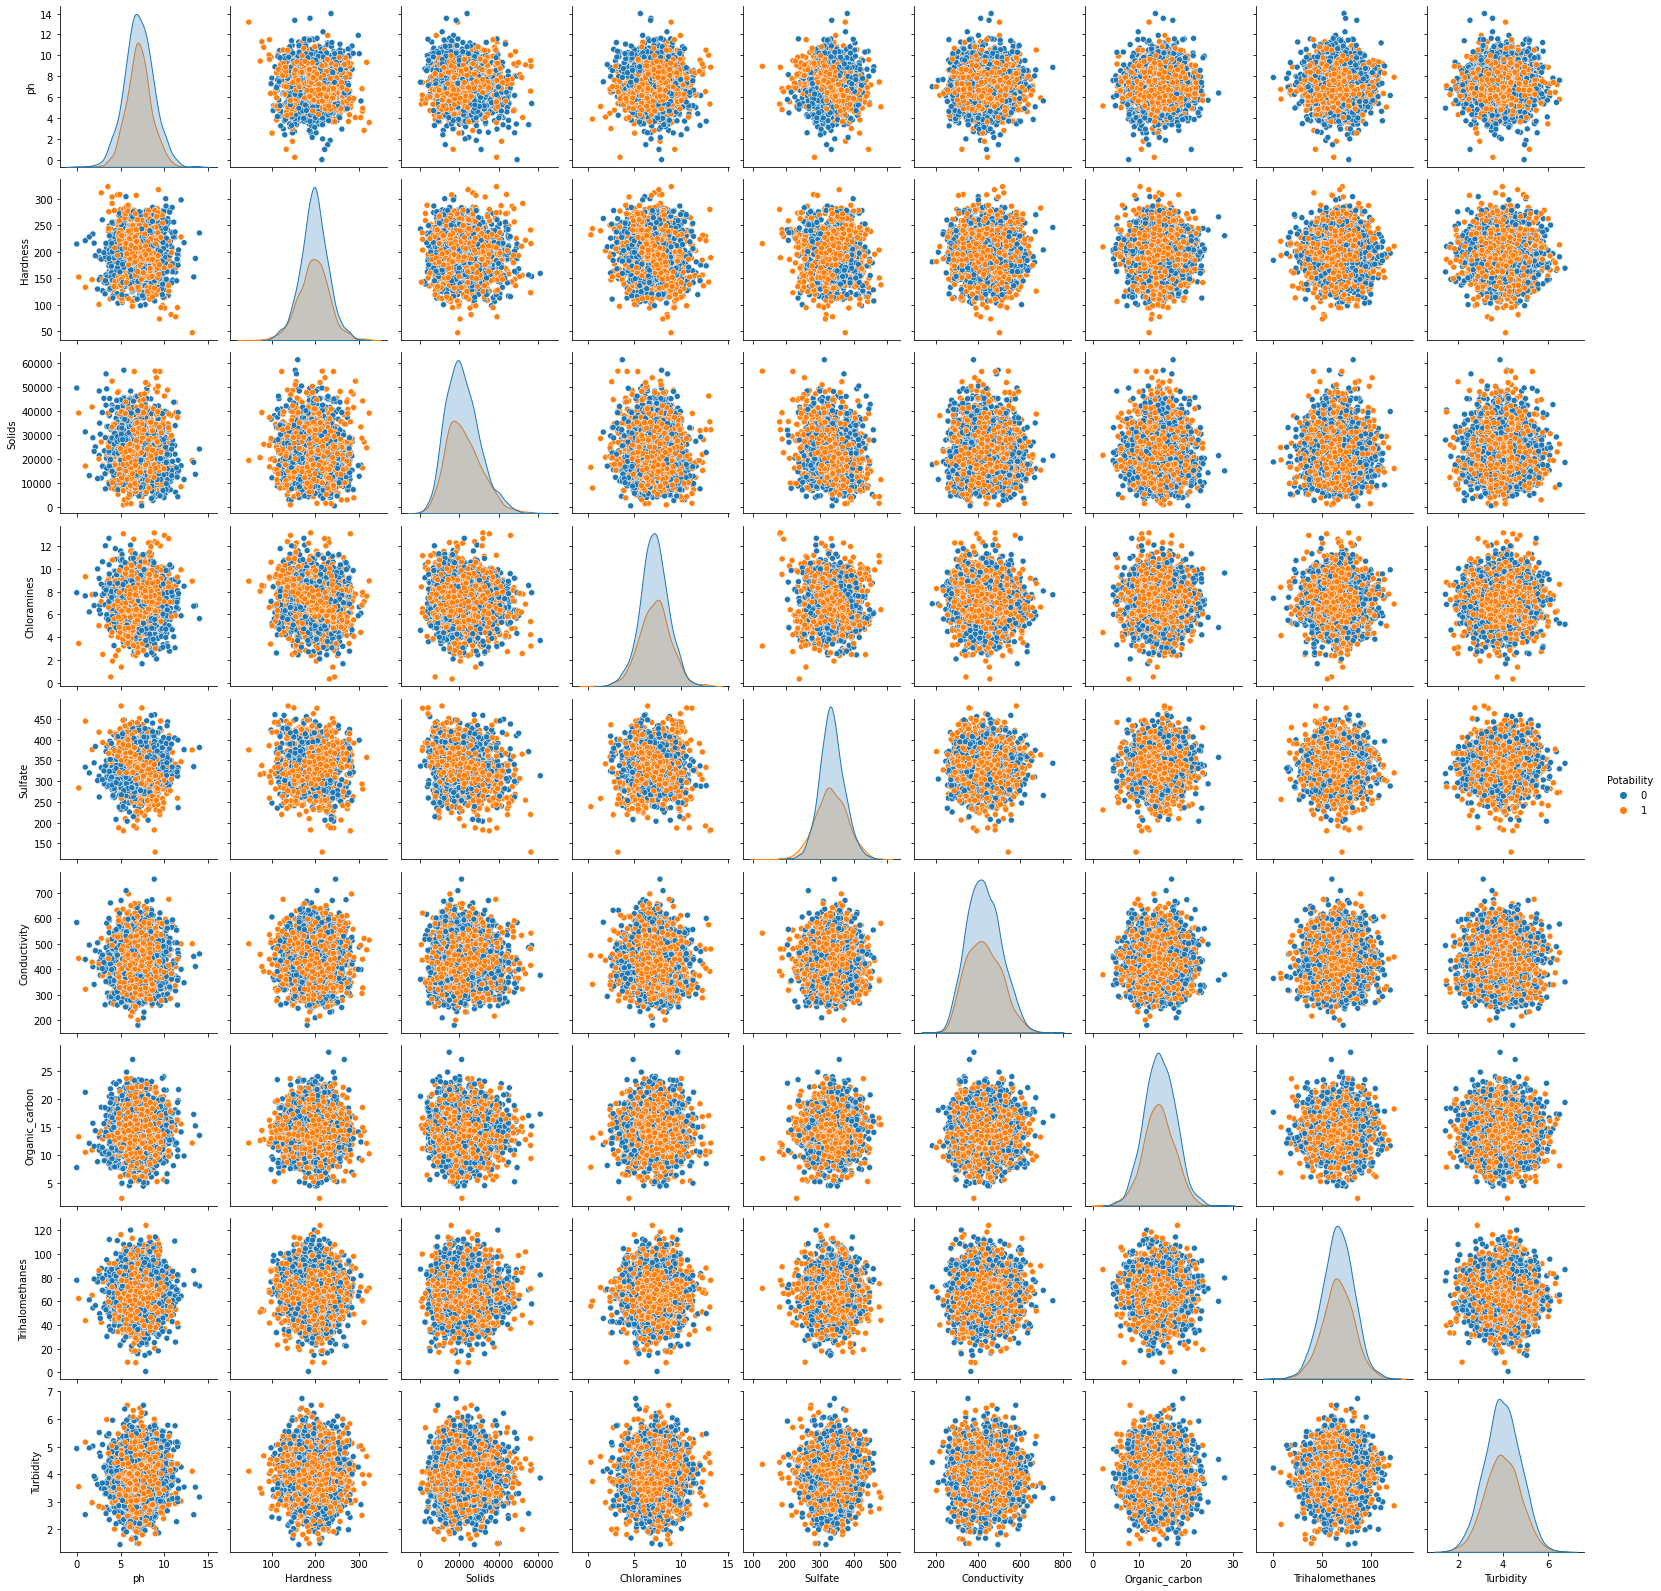

In [ ]:

fig = plt.figure()
sns.pairplot(data, hue = 'Potability')

It does'nt seem to be any linear relationship between the features as the plots are kind of circle. We can see here that there is no multicollinearity as was seen in the correlation matrix.



#### **Checking for missing values**

In [ ]:
# Looking for the missing values
data.isnull().sum()*100/len(data)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

We see that there are missing values for ph, Sulfate, and Trihalomethanes. We can impute values for them.

Let us see how these variables behave differently when potability is 0 and 1

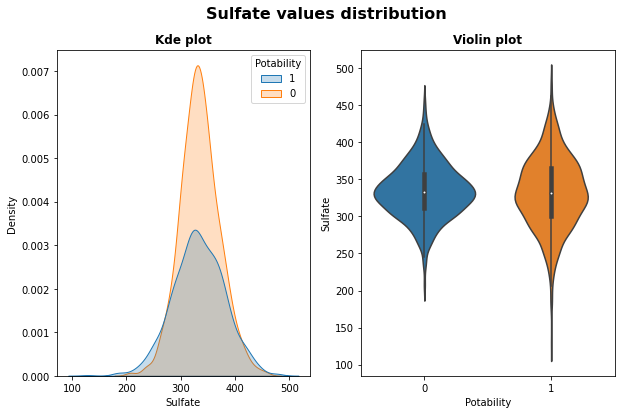

In [ ]:
#Sulfate
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (10,6))
sns.kdeplot(x = 'Sulfate', hue = 'Potability', fill = True, data = data, hue_order=[1,0], ax = axis1)
sns.violinplot(x = 'Potability', y = 'Sulfate', data = data, ax = axis2)

axis1.set_title('Kde plot', size = 12, weight = 'bold')
axis2.set_title('Violin plot', size = 12, weight = 'bold')
fig.suptitle('Sulfate values distribution', size = 16, weight = 'bold');


From the Kdeplot and Violin plot, the distribution of Sulfate is little different when the Potability is 0 and when it is 1. So, we can conclude that it has some influence on Potability and we can confirm that the column should be kept and missing values imputed. The same can be determined for the other two variables as seen below.

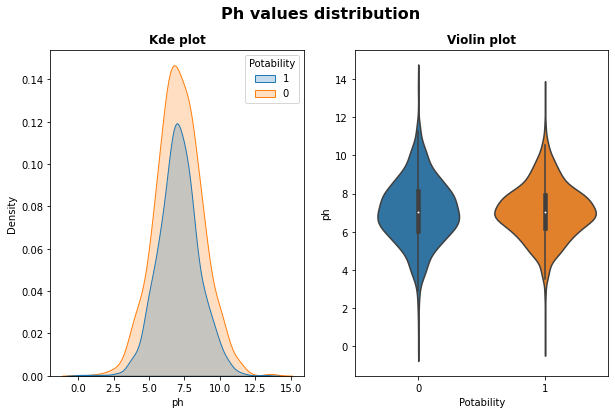

In [ ]:
#ph
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (10,6))
sns.kdeplot(x = 'ph', hue = 'Potability', fill = True, data = data, hue_order=[1,0], ax = axis1)
sns.violinplot(x = 'Potability', y = 'ph', data = data, ax = axis2)

axis1.set_title('Kde plot', size = 12, weight = 'bold')
axis2.set_title('Violin plot', size = 12, weight = 'bold')
fig.suptitle('Ph values distribution', size = 16, weight = 'bold');


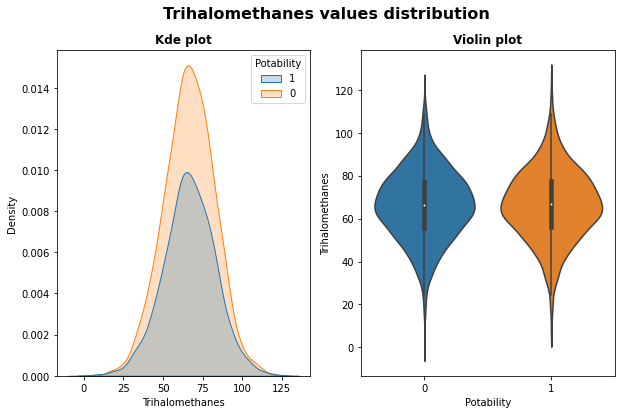

In [ ]:
#Trihalomethanes
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (10,6))
sns.kdeplot(x = 'Trihalomethanes', hue = 'Potability', fill = True, data = data, hue_order=[1,0], ax = axis1)
sns.violinplot(x = 'Potability', y = 'Trihalomethanes', data = data, ax = axis2)

axis1.set_title('Kde plot', size = 12, weight = 'bold')
axis2.set_title('Violin plot', size = 12, weight = 'bold')
fig.suptitle('Trihalomethanes values distribution', size = 16, weight = 'bold');

We can check the distribution of the variables to indicate how we will handle the missing values.

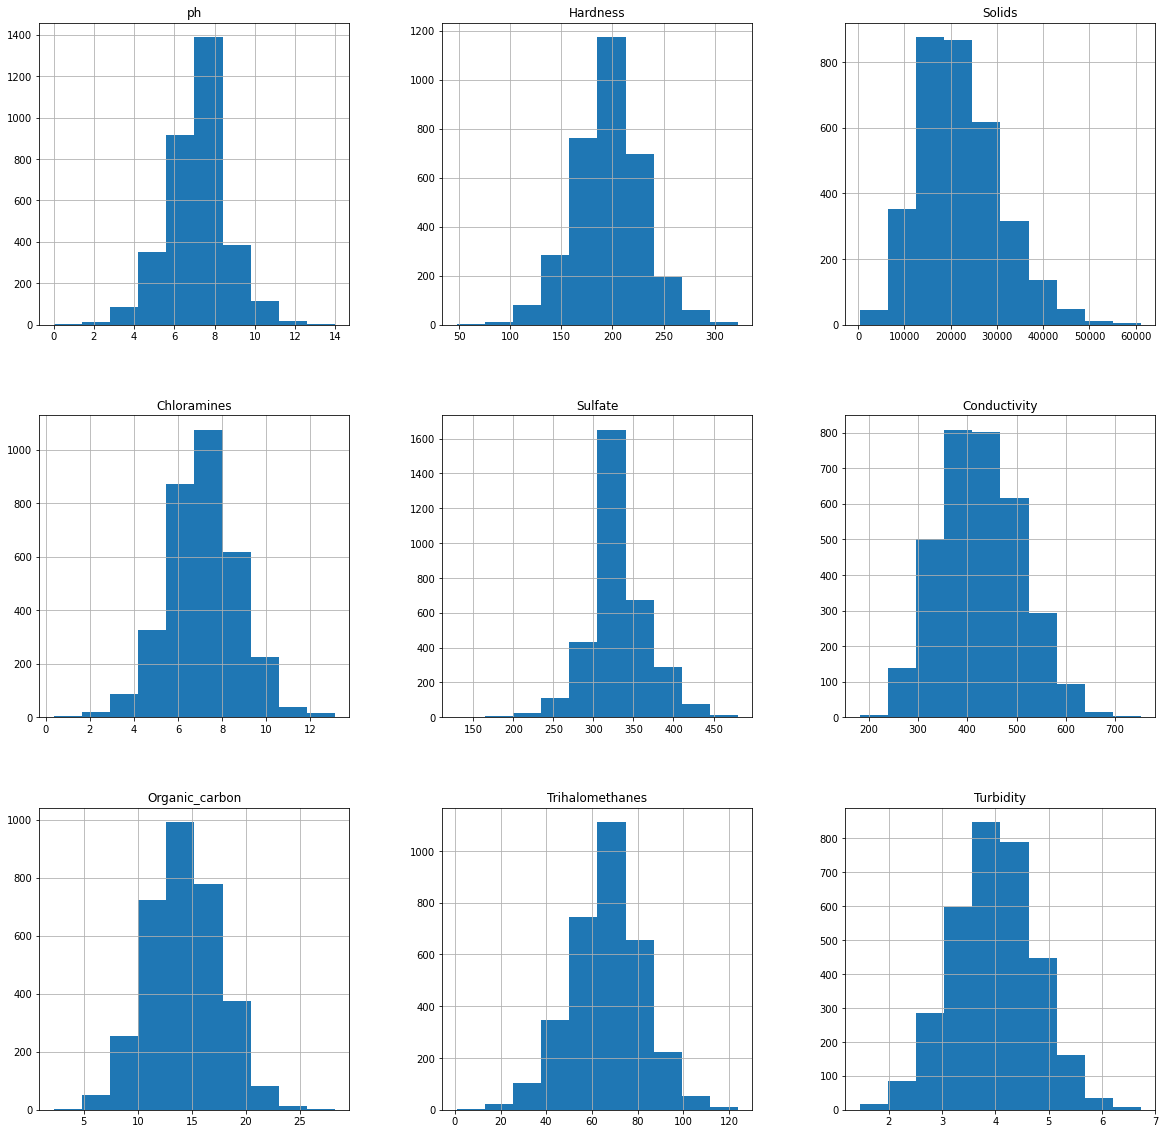

In [ ]:
data.drop('Potability', axis=1).hist(bins=10, figsize=(20, 20))
plt.show()

We will use the mean to replace the missing values since they are not skewed distributions. 

In [ ]:
phMean_0 = data[data['Potability'] == 0]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = phMean_0
phMean_1 = data[data['Potability'] == 1]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = phMean_1

SulfateMean_0 = data[data['Potability'] == 0]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = data[data['Potability'] == 1]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

TrihalomethanesMean_0 = data[data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = data[data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [ ]:
data.isnull().sum()*100/len(data)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

#### **Exploring and cleaning data**

#### **Hardness**
In some instances, consumers tolerate water hardness in excess of 500 mg/l.

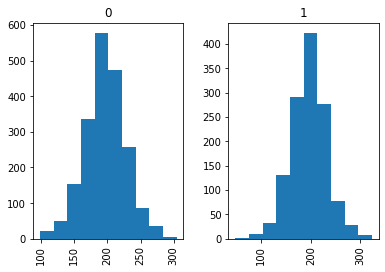

In [ ]:
data.hist(column='Hardness', by='Potability');

All values are within the acceptable range

#### **Solids (TDS)**
Desirable limit for TDS is 500 mg/L and maximum limit is 1000 mg/l which prescribed for drinking purpose. However these guidelines are based on taste. Over 1000 mg/L is considered unacceptable.

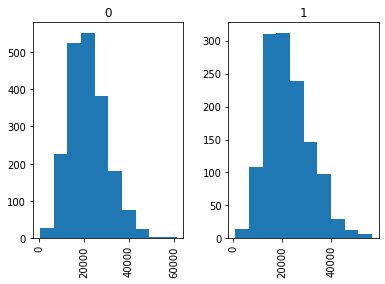

In [ ]:
data.hist(column='Solids', by='Potability');

There is a large number of water samples that are above the acceptable 1,000 mg/l TDS limit. However this would leave most of our water samples unaceptable, it is only for this reason we will not reclassify the water samples. There is expected to be a strong correclation between TDS and Conductivity.

#### **Chloramines**
Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water. Chloramines are lower based on taste and smell.

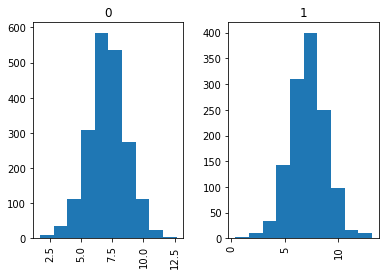

In [ ]:
data.hist(column='Chloramines', by='Potability');

Again there is a large number of samples that are above the acceptable drinking limits

#### **Sulfate**
It is generally considered that taste impairment is minimal at levels below 250 mg/l. No health-based guideline value has been derived for sulfate.

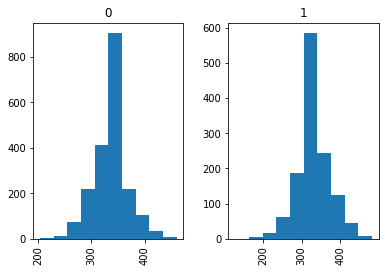

In [ ]:
data.hist(column='Sulfate', by='Potability');

There are a few values below what is considered good for drinking water. 

#### **Conductivity**
EC value should not exceeded 400 μS/cm.

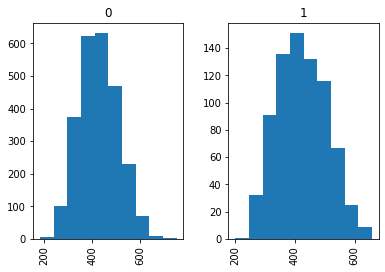

In [ ]:
data.hist(column='Conductivity', by='Potability');

Again some of the conductivity values of the samples calssified potable exceed the stated limits. Note again that we have no values that are close to seawater which contracts the Solids (TDS) values.

## Standardizing the data
To standardize the data, we scale the features to be normally distributed with a mean of zero and standard deviation of 1. This important since the data consists of various features with difference ranges of values and measures.

Not scaling the data would result in features with higher values dominating my model's performance and accuracy. It also removes possible outliers.

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

Text(0.5, 1.0, 'Feature distribution before scaling')

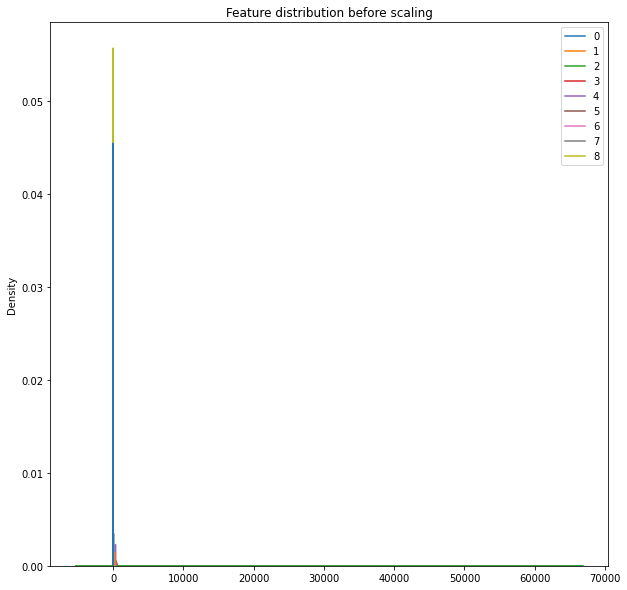

In [ ]:
fig = plt.subplots(ncols=1, figsize=(10,10))
sns.kdeplot(data=x_train)
plt.title('Feature distribution before scaling')

We can observe above that the range for different variables differ vastly and standardization is needed

Text(0.5, 1.0, 'Feature distribution after scaling')

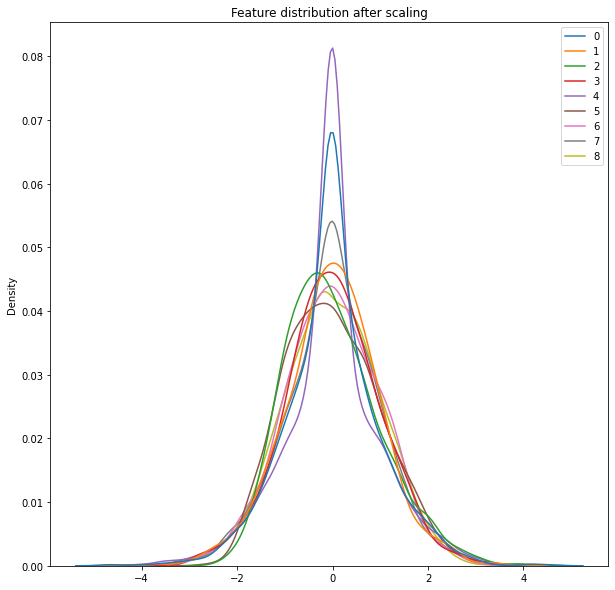

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
X = scl.fit_transform(X)
x_test = scl.transform(x_test)
fig = plt.subplots(ncols=1, figsize=(10,10))
sns.kdeplot(data=x_train)
plt.title('Feature distribution after scaling')

After standardizing our data, the variables are much more equally distributed (normally distributed) and a better fit for our model.

# Feature Selection

Feature selection involves manually or automatically selecting features which contribute the most to our predictor variable (target). This means selecting the features which assist the most in predicting whether the water is potable (0) or not (1). This is essential as having irrelevant features could decrease our model's accuracy.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=1)
modelRF.fit(x_train, y_train)
y_pred = modelRF.predict(x_test)
print(classification_report(y_test, y_pred))
imp = modelRF.feature_importances_

for i,v in enumerate(imp):
  print('Feature: %0d, Score: %.5f' % (i,v))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       585
           1       0.79      0.51      0.62       398

    accuracy                           0.75       983
   macro avg       0.76      0.71      0.71       983
weighted avg       0.76      0.75      0.73       983

Feature: 0, Score: 0.18391
Feature: 1, Score: 0.08974
Feature: 2, Score: 0.08202
Feature: 3, Score: 0.08481
Feature: 4, Score: 0.28057
Feature: 5, Score: 0.06908
Feature: 6, Score: 0.06899
Feature: 7, Score: 0.07143
Feature: 8, Score: 0.06946


Text(0.5, 1.0, 'Features ranked by importance')

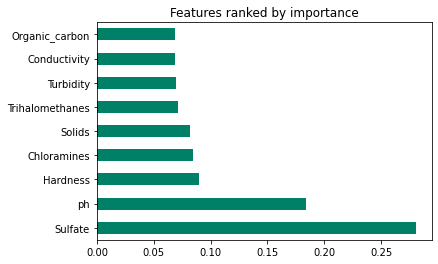

In [ ]:
index = data.columns[:-1]
impPlot = pd.Series(imp, index=index)
impPlot.nlargest(13).plot(kind='barh', colormap='summer')
plt.title('Features ranked by importance')

We see that the variables most highly correlated with the target variable (i.e. the variables that are most significant in determining our target value) are ph and Sulfate.

Since none of the variables, however, have significantly zero or no impact on the target variable, we will keep them all to use in the model.

# Probabalistic Model using PYMC3 for Water quality testing

PyMC is a Python package for Bayesian statistical modeling and probabilistic machine learning 

When using probabilistic modelling, we find that our parameters are random variables. This means that the probabilistic model will contain observed and unobserved random variables.

These observed variables are then defined using likelihood distributions and the unobserved variables are defined using prior distributions.

# Why Probabilistic Modelling?
Probabailistic models incorporate random variables and probability distributions into the model of an event or phenomenon. While a deterministic model gives a single possible outcome for an event, a probabilistic model gives a probability distribution as a solution. These models take into account the fact that we can rarely know everything about a situation. There’s nearly always an element of randomness to take into account.

In [ ]:
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
import theano as tt
from theano.tensor import dot
from sklearn.preprocessing import StandardScaler, scale
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Firstly, let us define our Model:


#### Priors:
Our priors are the features found within our dataset. When performing analysis we found it best to use all feature variables in our dataset after standardizing them as using all improves the model performance. 
Since the features are standardized, they are normally distributed with a mean of zero and a standard deviation of 1 which is specified in our model.

our mu is defined as $\alpha$ + $xtrain.\theta$

#### Posterior

Our posterior likelihood (target) is bernoulli since the water is either potable or not. We model 'success' (0) as being the water is potable in this project.'

For our predictions we use the sigmoid output function. This maps our predicted values to probabilities. We thus are provided with our measurement of uncertainty by the model.

In [ ]:
import pymc3 as pm
with pm.Model() as LRmodel:
  #Priors
  theta = pm.Normal('theta', 0,1, shape=X.shape[1])
  alpha = pm.Normal('alpha', 0, 5)
  mu = alpha + pm.math.matrix_dot(X, theta)
  p_ = pm.Deterministic('p', pm.math.sigmoid(mu))
  y_obs = pm.Bernoulli('p-lik', p = p_, observed = y)
  
  trace_g = pm.sample(draws=1000)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # Remove the CWD from sys.path while we load stuff.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.


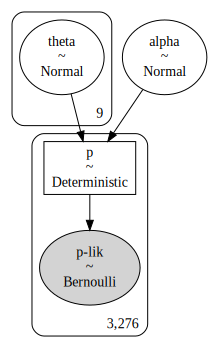

In [ ]:
pm.model_to_graphviz(LRmodel)

In [ ]:
az.summary(trace_g, var_names=['alpha'])

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.45,0.038,-0.52,-0.383,0.001,0.0,2878.0,1464.0,1.0


In [ ]:
with LRmodel:
  ppc = pm.sample_posterior_predictive(trace_g)
  

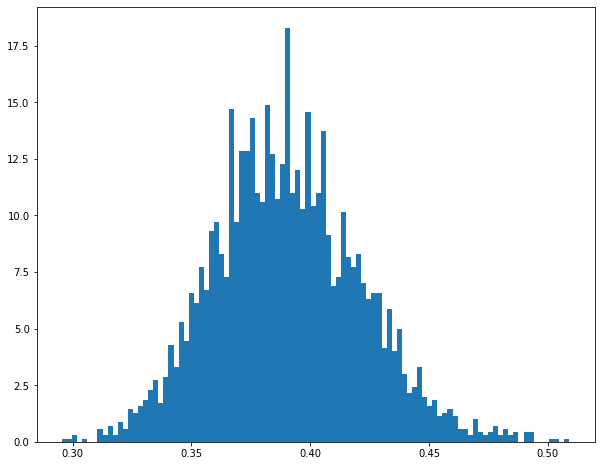

In [ ]:
y_ = ppc['p-lik'].mean(axis=0)
_,ax = plt.subplots(figsize=(10,8))
ax.hist(y_,bins=100, density=True)
plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f335a9b9cd0>,
      dtype=object)

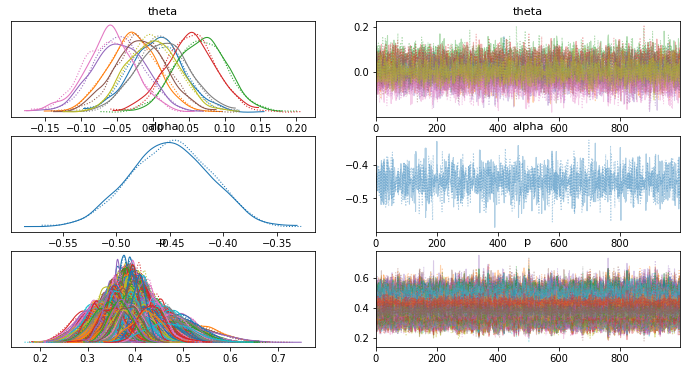

In [ ]:
az.plot_trace(trace_g)

We can note that the plots on the right are smooth and thus the model has converged and fits the data well.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


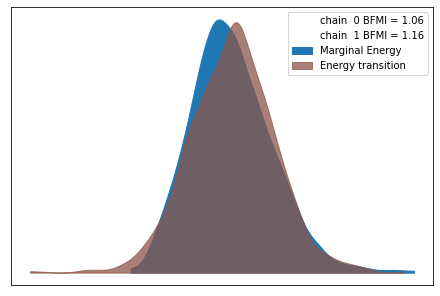

In [ ]:
pm.energyplot(trace_g)

The above energy plot assists in evaluating the convergence of the model. It provides a summary of how efficiently the random process explores the posterior. In order for the posterior to be efficiently explored, the marginal energy and energy transitions need to be as similar as possible, as is the case above. 

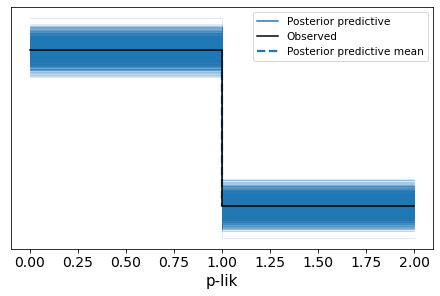

In [ ]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model= LRmodel));

The above plot demonstrates whether the model fits the data well or not. From the visualization, it is evident that the model fits the data well, as the posterior predictive mean is aligned with the observed data

In [ ]:
pred = np.array(([1 if x>0.5 else 0 for x in y_]))
len(pred[pred==1])/pred.size

0.0009157509157509158

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y, pred)

array([[1998,    0],
       [1275,    3]])

In [ ]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1998
           1       1.00      0.00      0.00      1278

    accuracy                           0.61      3276
   macro avg       0.81      0.50      0.38      3276
weighted avg       0.76      0.61      0.46      3276



The overall accuracy of our model is 61% which is relatively good.

We however see that the model is better at predicting when water potable rather than not potable.
Which means that we either miscoded somewhere or we indeed needed to balance the dataset.

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:496: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (3286) in plot_posterior, generating only 40 plots
  UserWarning,


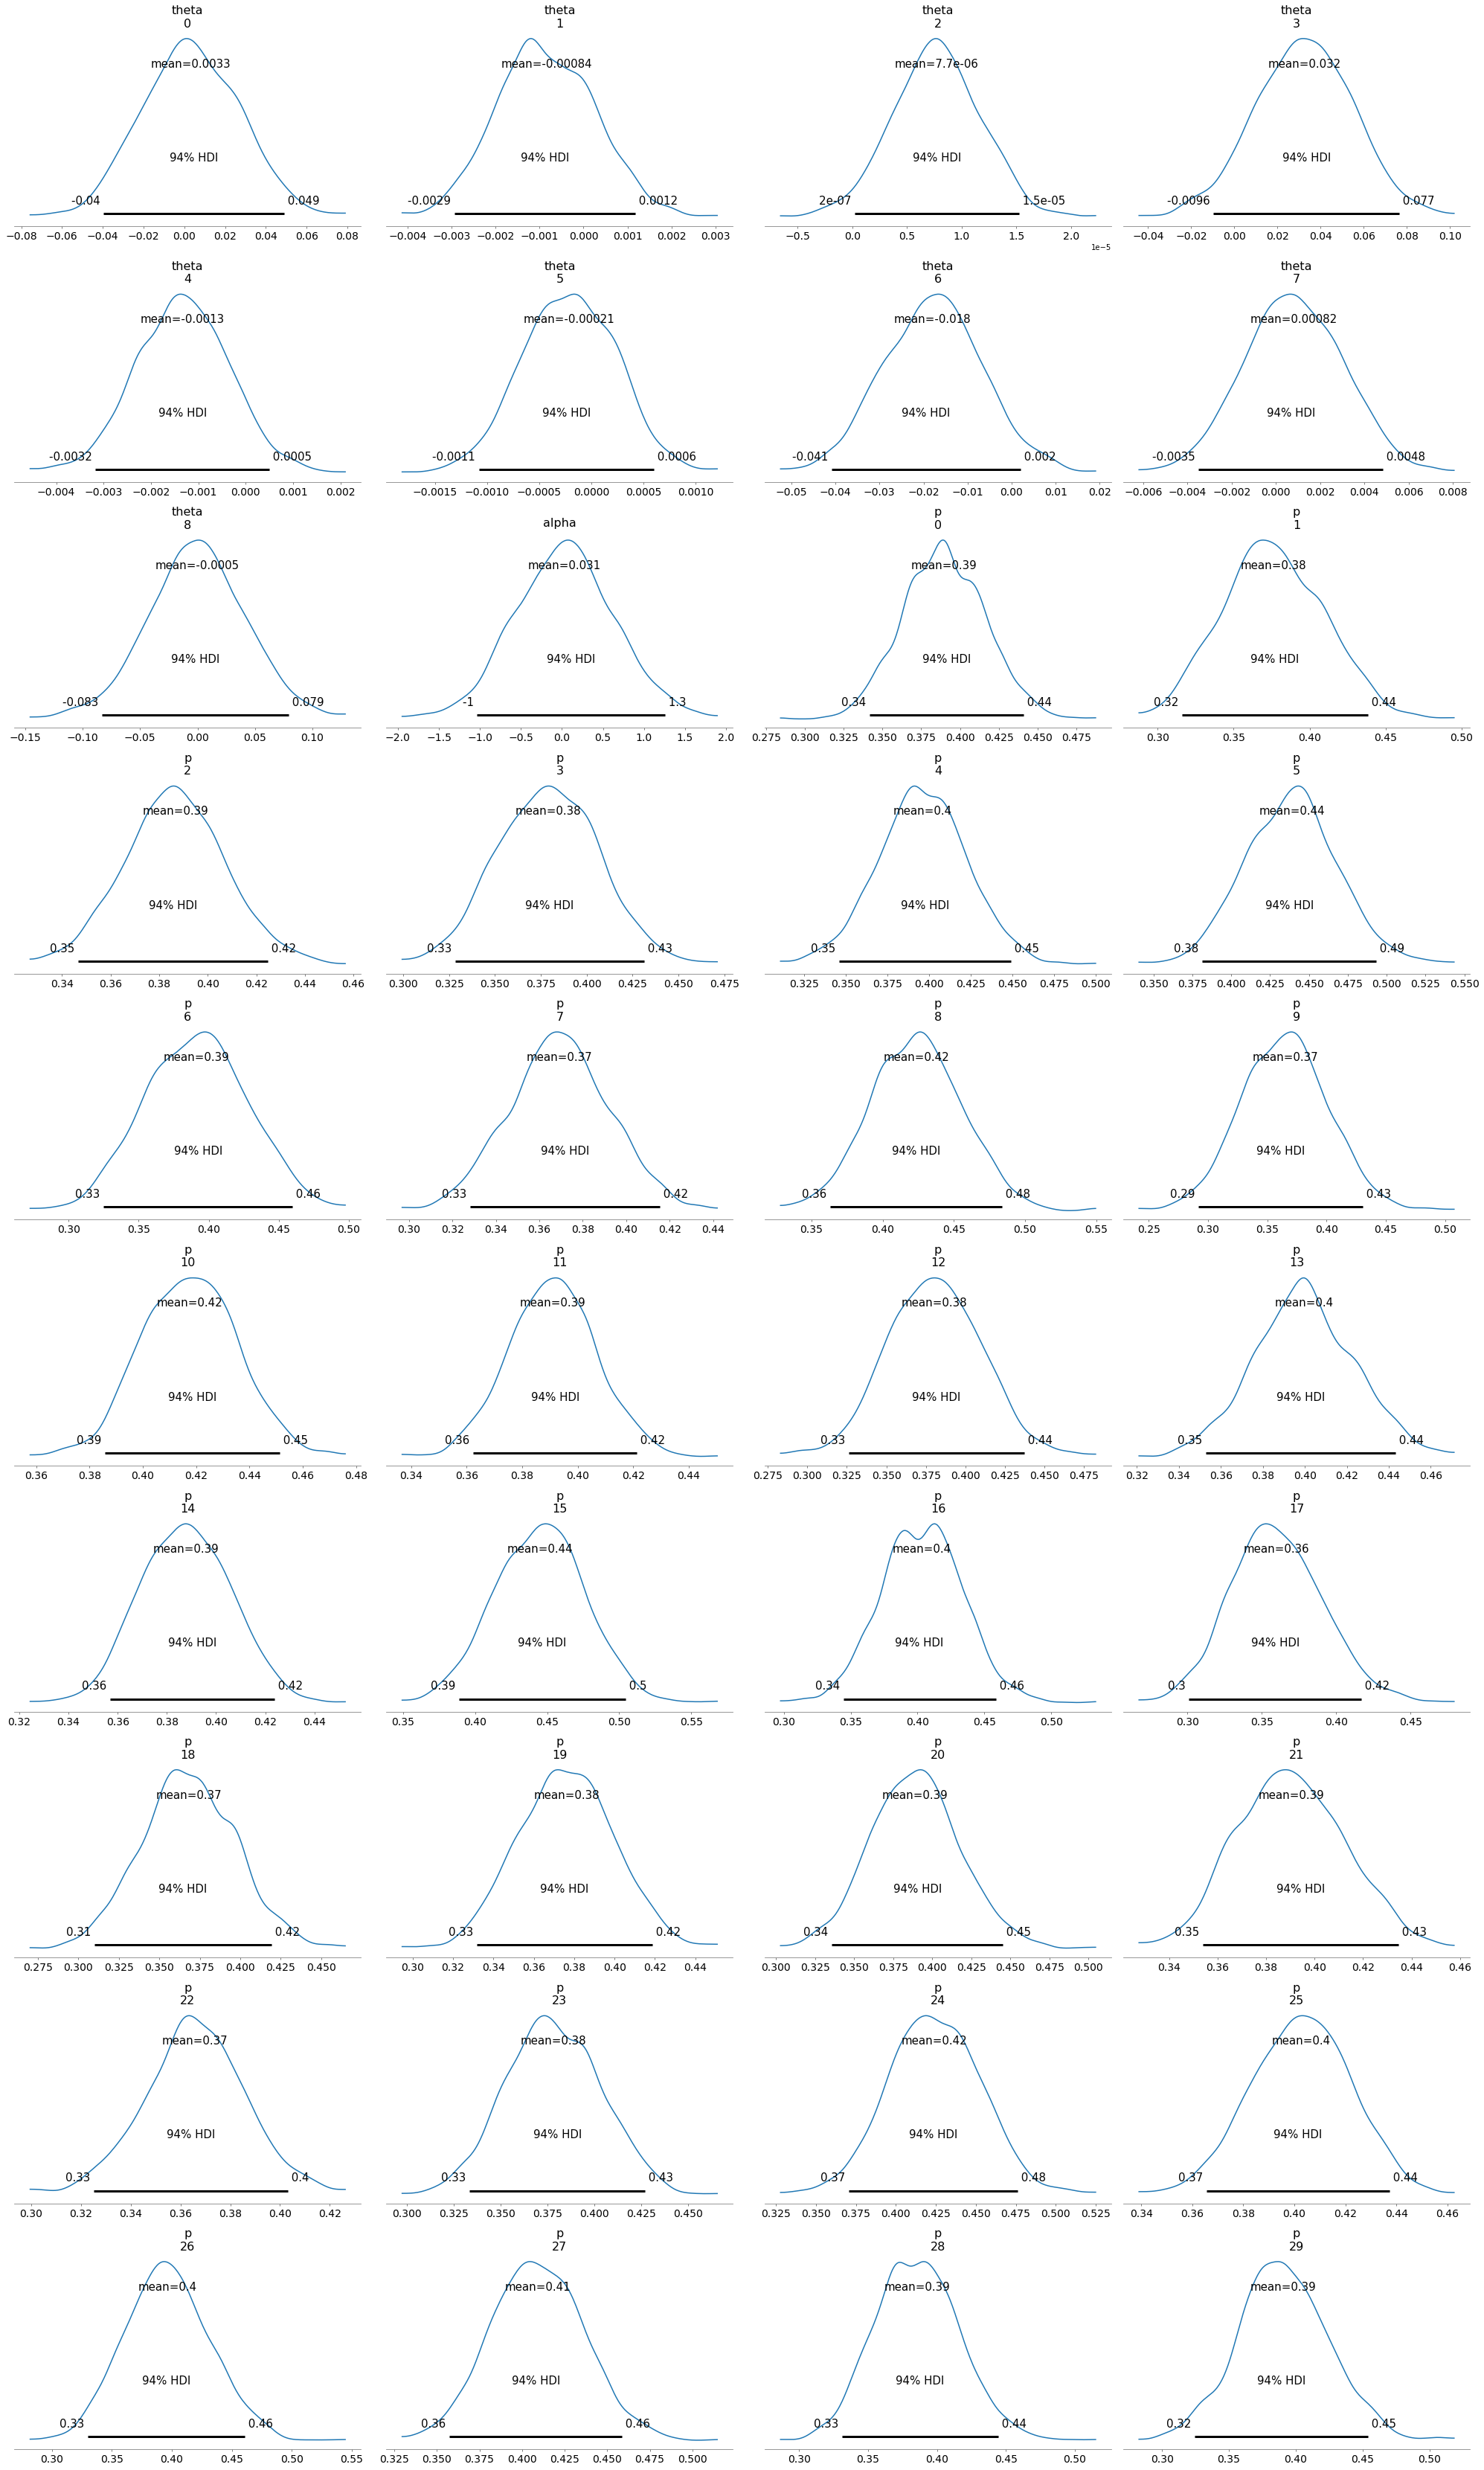

In [ ]:
az.plot_posterior(trace_g);

# Comparing Probabilistic Model to 3 other Models

#### Logistic Regression
Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. 
.

**Advantages**

- It is efficient and has a straightforward nature.
- Logistic regression does not require high computation power and it is easy to implement
- Logistic regression is easily interpretable.


**Disadvantages**

- It cannot handle a large number of categorical features
- It is sensitive to overfitting
- Non-linear problems cannot be solved with logistic regression.
- It does not perform well with independent features that are not correlated to the target feature.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train,y_train)

print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Advantages:**
- SVM works relatively well when there is a clear margin of separation between classes.
- SVM is more effective in high dimensional spaces.
- SVM is effective in cases where the number of dimensions is greater than the number of samples.
- SVM is relatively memory efficient


**Disadvantages:**
- SVM algorithm is not suitable for large data sets.
- SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
- In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
- As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.

In [ ]:
from sklearn.svm import SVC
model1= SVC(random_state=1)
model1.fit(x_train, y_train)

ypred1 = model1.predict(x_test)
print('Classification Report for SVM')
print(classification_report(y_test, ypred1))

Classification Report for SVM
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       585
           1       0.72      0.28      0.41       398

    accuracy                           0.67       983
   macro avg       0.69      0.61      0.59       983
weighted avg       0.68      0.67      0.62       983



## Decision Trees

**Advantages:**

- Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
- A decision tree does not require normalization of data.
- A decision tree does not require scaling of data as well.
- Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
- A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

**Disadvantage:**
- A small change in the data can cause a large change in the structure of the decision tree causing instability.
- For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
- Decision tree often involves higher time to train the model.
- Decision tree training is relatively expensive as the complexity and time has taken are more.
- The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(x_train, y_train)
ypred2 = model2.predict(x_test)
print('Classification report for Decision Tree Classifier')
print(classification_report(y_test, ypred2))

Classification report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       585
           1       0.61      0.64      0.62       398

    accuracy                           0.69       983
   macro avg       0.68      0.68      0.68       983
weighted avg       0.69      0.69      0.69       983



**Overall Remarks:**

Models perform fairly well but can be improved on. It can be used to predict the potability of water but seems biased to the potable water class when using the pymc3 and logistic regression models and support vector machine models.
 A possibility is balancing the classes more to improve the model performance.  We can also reduce the number of features used to train the models since currently we used all the features.
 
 The best performing model was the random forest model which we used to determine feature importance, with an overall accuracy of 75%

In [ ]:
# save model to disk

with open('water_quality1.pkl', 'wb') as buff:
    pickle.dump({'model': LRmodel, 'trace': trace_g}, buff)